<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/Aula_01_Introdu%C3%A7%C3%A3o_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

Existem várias bibliotecas Python que fornecem implementações sólidas de uma variedade de algoritmos de aprendizado de máquina. Uma das mais conhecidas é o Scikit-Learn, um pacote que fornece versões eficientes de um grande número de algoritmos comuns. O Scikit-Learn é caracterizado por uma API limpa, uniforme e simplificada, além de uma documentação on-line muito útil e completa. Um benefício dessa uniformidade é que, uma vez que você entenda o uso básico e a sintaxe do Scikit-Learn para um tipo de modelo, mudar para um novo modelo ou algoritmo é muito simples.

Esta seção fornece uma visão geral da API do Scikit-Learn; um entendimento sólido desses elementos da API formará a base para entender a discussão prática mais profunda dos algoritmos e abordagens de aprendizado de máquina nos capítulos seguintes.

Começaremos abordando a representação de dados no Scikit-Learn, seguido pela cobertura da API de Estimadores e, finalmente, passaremos por um exemplo mais interessante de uso dessas ferramentas para explorar um conjunto de imagens de dígitos escritos à mão.

## Representação de dados no Scikit-Learn

A aprendizagem de máquina trata da criação de modelos a partir de dados: por esse motivo, começaremos discutindo como os dados podem ser representados para serem compreendidos pelo computador. A melhor maneira de pensar sobre dados no Scikit-Learn é em termos de tabelas de dados.

###Dados como tabela

Uma tabela básica é uma grade bidimensional de dados, na qual as linhas representam as amostras individuais do conjunto de dados e as colunas representam as características relacionadas a cada um dessas amostras. Por exemplo, considere o conjunto de dados Íris, analisado por Ronald Fisher em 1936. Podemos baixar esse conjunto de dados na forma de um DataFrame do Pandas usando a biblioteca seaborn:

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aqui, cada linha dos dados se refere a uma única flor observada, e o número de linhas é o número total de flores no conjunto de dados. (n_samples)

Da mesma forma, cada coluna dos dados se refere a uma peça quantitativa específica de informação que descreve cada amostra. Em geral, nos referiremos às colunas da matriz como características e ao número de colunas como n_features.

#### Rótulo (Classe)

Por exemplo, nos dados anteriores, podemos desejar construir um modelo que possa prever a espécie da flor com base em outras medições; nesse caso, a coluna de espécies seria considerada como a classe.

Com isso em mente, podemos visualizar os dados separados por classe e características para analisar a distribuição.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


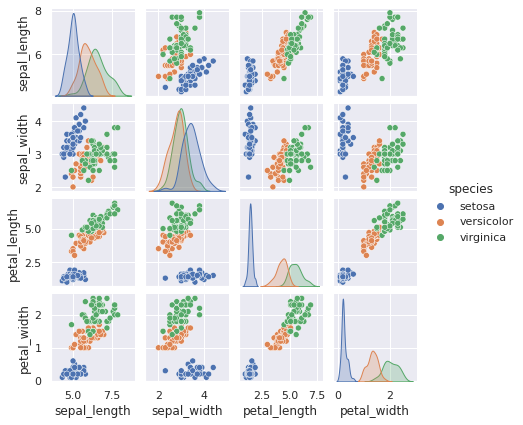

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Para treinarmos um modelo utilizando a matriz, necessitamos seperar o vetor de característica (x) e o seu rótulo (y)

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

### Aprendizado Supervisionado: Classificação Base Iris 


#Preparação dos dados

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [9]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)             

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

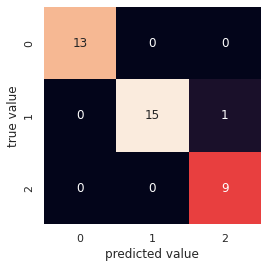

In [11]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

#0 -> Setosa, 1 -> Versicolor, 2 -> Verginica

### Digitos Manuscritos



In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape



(1797, 8, 8)

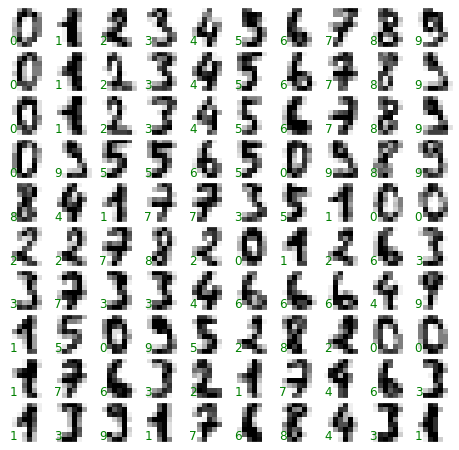

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
X = digits.data
y = digits.target
y.shape
print(X.shape, y.shape)

#Data preparation (Holdout)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

(1797, 64) (1797,)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


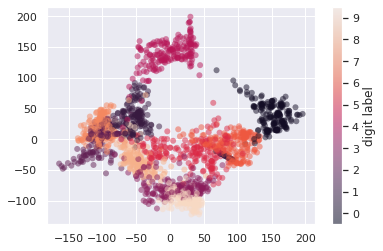

In [22]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

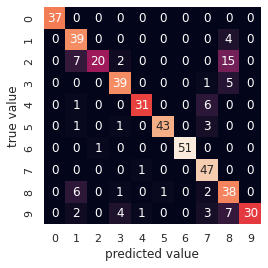

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

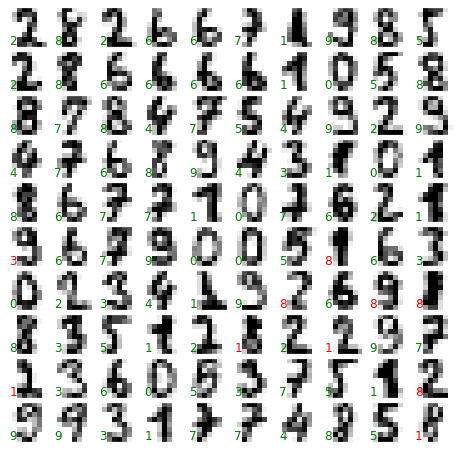

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')